In [2]:
import pandas as pd
from pathlib import Path
import datetime
import geopy.distance

file = str(Path.home())+"/.imp/gossip_writeup_postprocessing.csv"
df = pd.read_csv(file) 

df=df.rename(columns={'timestamp':'posix_timestamp'})
df['posix_timestamp']=df['posix_timestamp'].round(decimals=3)
GENESIS_TIME=1590537600
df['slot_timestamp']=df['slot']*12.0 + GENESIS_TIME 
df['relative_timestamp']=df['posix_timestamp']-df['slot_timestamp']

# load dht data
%store -r df_dht

display(df['posix_timestamp'].max())
display(df['slot'].max())

df = pd.merge(df, df_dht, on='peer_id', how='left',suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df['is_validator']=df['subnet_ids']!='[]'

REF_LOC=(32.894970,-97.187430)
distance=[]
for coordinates in df['coordinates'].to_list():
    distance.append(geopy.distance.vincenty(coordinates, REF_LOC).km)
df['distance']=distance
df=df[df['slot']<=112867]
df.head(n=5)

1592093966.11

129697

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


,index,posix_timestamp,message_id,peer_id,topic,message_size,slot,proposer_index,slot_timestamp,relative_timestamp,...,udp6,next_fork_version,next_fork_epoch,fork_digest,seq_no,subnet_ids,enr,coordinates,is_validator,distance
0,0,1.591807e+09,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCS...,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1.591807e+09,0.339,...,NaN,113,18446744073709551615,f6775d07,15,[19],enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyF...,"29.7633,-95.3633",True,388.187138
1,1,1.591807e+09,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bAD...,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1.591807e+09,0.557,...,NaN,113,18446744073709551615,f6775d07,1,[],enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb...,"36.8080,-76.0284",False,1978.708743
2,2,1.591807e+09,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RK...,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1.591807e+09,0.742,...,NaN,113,18446744073709551615,f6775d07,5,[],enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE7...,"36.8080,-76.0284",False,1978.708743
3,3,1.591807e+09,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5Vxk...,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1.591807e+09,0.923,...,NaN,113,18446744073709551615,f6775d07,9,[13],enr:-LK4QIqTXvroJqUG2oYGLNxQOO1ES2SdVsWZPUTX37...,"37.3483,-121.9844",True,2306.521531
4,4,1.591807e+09,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7...,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1.591807e+09,1.102,...,NaN,113,18446744073709551615,f6775d07,7,[],enr:-LK4QAWPjZDsaRdKDrtkgZd3v0PAhpGMPz1-m_W1S3...,"36.8080,-76.0284",False,1978.708743


In [3]:
import pandas as pd
from pathlib import Path
import json


file = str(Path.home())+"/.witti/afri-lh-keys.txt"
lh_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-prysm-keys.txt"
prysm_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-teku-keys.txt"
teku_keys = pd.read_csv(file,header=None)[0].to_list()

afrikeys_to_client = dict.fromkeys(lh_keys , 'lighthouse')
afrikeys_to_client.update(dict.fromkeys(prysm_keys , 'prysm'))
afrikeys_to_client.update(dict.fromkeys(teku_keys , 'teku'))

with open(str(Path.home())+"/.witti/pubkeys.json") as json_file: 
    pubkeys_to_indexes = json.load(json_file) 
    

df_validator_registry = pd.DataFrame({'index' : list(pubkeys_to_indexes.values()),'pubkey' : list(pubkeys_to_indexes.keys())})

clients=[]
is_afrikeys=[]
for key in df_validator_registry['pubkey'].to_list():
    if key in afrikeys_to_client:
        is_afrikeys.append(1)
        clients.append(afrikeys_to_client[key])
    else:
        is_afrikeys.append(0)
        clients.append('unknown')
    

df_validator_registry['is_afri_key']=is_afrikeys
df_validator_registry['client']=clients


In [4]:
# basics numbers
start_slot = df['slot'].min()
end_slot = df['slot'].max()
print("Starting slot: {}".format(start_slot))
print("Ending slot: {}".format(end_slot))
print("Number of slots: {}".format(end_slot-start_slot))
num_messages = len(df)
print("Number of messages: {}".format(num_messages))
print("Average number of messages per slot: {}".format(num_messages/(end_slot-start_slot)))
print("Number of messages from validating nodes: {}".format((len(df[df['is_validator']==True]))))
print("Number of messages from non-validating nodes: {}".format((len(df[df['is_validator']==False]))))
peers=set(df['peer_id'])
print("Number of peers: {}".format((len(peers))))
validating_peers=set(df[df['is_validator']==True]['peer_id'].to_list())
print("Number of peers validating: {}".format((len(validating_peers))))
non_validating_peers=set(df[df['is_validator']==False]['peer_id'].to_list())
print("Number of peers not validating: {}".format((len(non_validating_peers))))

block_slots_received = set(df['slot'].to_list())
slots=set(range(df['slot'].min(),df['slot'].max()))
print("Number of missing block slots:", len(slots.difference(block_slots_received)), "of", df['slot'].max()-df['slot'].min()) 
 

Starting slot: 105787
Ending slot: 112867
Number of slots: 7080
Number of messages: 82760
Average number of messages per slot: 11.689265536723164
Number of messages from validating nodes: 49437
Number of messages from non-validating nodes: 33323
Number of peers: 17
Number of peers validating: 11
Number of peers not validating: 6
Number of missing block slots: 1512 of 7080


In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.15f' % x)


pd.reset_option('display.max_rows')



In [6]:
df.groupby(['proposer_index','message_id','slot','message_size'])['relative_timestamp'].describe()

count              mean               std               min               25%               50%               75%               max
proposer_index message_id                                   slot   message_size                                                                                                                                                 
0              SYlj3rrSBg3maTujnBQcy4P9NfhFmBx3RvFIbGdTDtU= 106709 1112         17.000000000000000 1.612999986199772 0.743228239695066 0.400000095367432 1.052999973297119 1.601999998092651 2.194000005722046 2.773999929428101
               ecJMoDX-mEqBo9MVeCMLTuPdfRkh8CmtH6IvNgUyi3g= 112350 876          13.000000000000000 1.054230745022114 0.406055644654907 0.414999961853027 0.746000051498413 1.053999900817871 1.365999937057495 1.677000045776367
               l1VzL6gVwEKeJrEqoMxazqmv8nlV7LiDyp7aXs-TWBE= 109265 640          15.000000000000000 0.975866667429606 0.454027963521259 0.372999906539917 0.662500023841858 0.930999994277954 1.199499964714050 2.168999910354614
               qAsFh-2CNQ0qie1O3x_jTn4BQd7gmEil9pTpq5gS0ag= 109574 876          14.000000000000000 1.124000004359654 0.445063518479868 0.407999992370605 0.783749997615814 1.126499891281128 1.468749940395355 1.812000036239624
               x-t_szLNfJLfVCbI_H2ytxDsktajIWNOF_NNUpGvc5U= 110717 876          14.000000000000000 1.163285732269287 0.518662982400192 0.408999919891357 0.769250035285950 1.125000000000000 1.483999967575073 2.095999956130981
...                                                                                            ...               ...               ...               ...               ...               ...               ...               ...
917            g1t1J9cVa2Pbqh-hT3NsBa5k9YF3rSdeY2Tss7pjAzo= 110175 640          14.000000000000000 0.852357166154044 0.324010327451106 0.338000059127808 0.603000104427338 0.853500008583069 1.104500055313110 1.352999925613403
               kX9U06-TKiw8h0WrXn-xcbhyE0Zd6Dd_bHyv_WGVZho= 111197 1112         14.000000000000000 1.364285690443856 0.561776653331954 0.477999925613403 0.924250006675720 1.373999953269958 1.798000037670135 2.236999988555908
918            89L_nUfqIMZGjC_uQF85EyMbUkagDY8VJ5JOFAr_588= 112218 640          14.000000000000000 0.868357147489275 0.336290973967777 0.334000110626221 0.605000019073486 0.878499984741211 1.128750026226044 1.382999897003174
               K2v1Oi9HmbXGYVfW5NhByGCqtCAJ59FBDhyHn1JDlc8= 110373 876          14.000000000000000 1.251214299883161 0.520255734721843 0.315000057220459 0.911750018596649 1.307999968528748 1.645250022411346 1.984999895095825
               wNZLOM_hWdcI2ze_s7E5xkxZsZBqkW89ZFdshUupVQ4= 111716 1584         14.000000000000000 1.735928620610918 0.759008749428107 0.543999910354614 1.149250090122223 1.736999988555908 2.325750052928925 2.913000106811523

[5569 rows x 8 columns]

In [7]:
grouped_df = df.groupby(['proposer_index','message_id','slot','message_size']).agg({'relative_timestamp':['count','std','min','max']})
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,proposer_index,message_id,slot,message_size,relative_timestamp_count,relative_timestamp_std,relative_timestamp_min,relative_timestamp_max
0,0,SYlj3rrSBg3maTujnBQcy4P9NfhFmBx3RvFIbGdTDtU=,106709,1112,17,0.743228239695066,0.400000095367432,2.773999929428101
1,0,ecJMoDX-mEqBo9MVeCMLTuPdfRkh8CmtH6IvNgUyi3g=,112350,876,13,0.406055644654907,0.414999961853027,1.677000045776367
2,0,l1VzL6gVwEKeJrEqoMxazqmv8nlV7LiDyp7aXs-TWBE=,109265,640,15,0.454027963521259,0.372999906539917,2.168999910354614
3,0,qAsFh-2CNQ0qie1O3x_jTn4BQd7gmEil9pTpq5gS0ag=,109574,876,14,0.445063518479868,0.407999992370605,1.812000036239624
4,0,x-t_szLNfJLfVCbI_H2ytxDsktajIWNOF_NNUpGvc5U=,110717,876,14,0.518662982400193,0.408999919891357,2.095999956130981
...,...,...,...,...,...,...,...,...
5564,917,g1t1J9cVa2Pbqh-hT3NsBa5k9YF3rSdeY2Tss7pjAzo=,110175,640,14,0.324010327451106,0.338000059127808,1.352999925613403
5565,917,kX9U06-TKiw8h0WrXn-xcbhyE0Zd6Dd_bHyv_WGVZho=,111197,1112,14,0.561776653331954,0.477999925613403,2.236999988555908
5566,918,89L_nUfqIMZGjC_uQF85EyMbUkagDY8VJ5JOFAr_588=,112218,640,14,0.336290973967777,0.334000110626221,1.382999897003174
5567,918,K2v1Oi9HmbXGYVfW5NhByGCqtCAJ59FBDhyHn1JDlc8=,110373,876,14,0.520255734721843,0.315000057220459,1.984999895095825


In [45]:
df_outer = pd.merge(df, grouped_df, on='message_id', how='outer',suffixes=('', '_y'))
df_outer.drop(df_outer.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_outer.head()

,index,posix_timestamp,message_id,peer_id,topic,message_size,slot,proposer_index,slot_timestamp,relative_timestamp,timestamp,node_id,ip4,tcp4,udp4,ip6,tcp6,udp6,next_fork_version,next_fork_epoch,fork_digest,seq_no,subnet_ids,enr,coordinates,is_validator,distance,relative_timestamp_count,relative_timestamp_std,relative_timestamp_min,relative_timestamp_max
0,0,1591807044.338999986648560,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1591807044.000000000000000,0.338999986648560,2020-06-15][11:06:18,eb353d66e608aa61933fa5a2b0b16b9980065633d3abcfbef956fea87f2e1878,104.190.27.0,9000.000000000000000,9000,NaN,nan,nan,113,18446744073709551615,f6775d07,15,[19],enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyFSRkvmGRMlXeqiv6Mf-HNgjyB8WkMhGRY4rV6oe33Qe8Y2WZNIPh2F0dG5ldHOIAAAIAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhGi-GwCJc2VjcDI1NmsxoQLz2pdBEwOy2_gyO-pGD9_6sH8W43pFeeZ5hUcME0w8woN0Y3CCIyiDdWRwgiMo,"29.7633,-95.3633",True,388.187137993303224,16,0.867455246658940,0.338999986648560,3.095000028610229
1,1,1591807044.556999921798706,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1591807044.000000000000000,0.556999921798706,2020-06-15][11:06:18,a08f914106b772a8a939689d6d14e50c7754df6111f9a6d4bb306afa632b18e9,3.233.217.200,9000.000000000000000,9000,NaN,nan,nan,113,18446744073709551615,f6775d07,1,[],enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb-VjjxnaaoxIMIpKSJwM4pz25WCKKiFGhvQVWnYuF3CsNY5rBEBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhAPp2ciJc2VjcDI1NmsxoQMZIaFoHuNOy1WURF3xq-M49Mg8G0i2cNpGt2j1A5gH-YN0Y3CCIyiDdWRwgiMo,"36.8080,-76.0284",False,1978.708742628404480,16,0.867455246658940,0.338999986648560,3.095000028610229
2,2,1591807044.742000102996826,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1591807044.000000000000000,0.742000102996826,2020-06-15][11:06:18,38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1,54.243.252.53,13000.000000000000000,13000,NaN,nan,nan,113,18446744073709551615,f6775d07,5,[],enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE74DiQ_ecpZ_F8I24fYCXiP1h-bitXDO0Tpr9II8QJSwU11DkUUFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbz_DWJc2VjcDI1NmsxoQJjwXmPxs41IbsE-YdxM73EvSHbvyK8hCpg528lt6N6B4N0Y3CCMsiDdWRwgjLI,"36.8080,-76.0284",False,1978.708742628404480,16,0.867455246658940,0.338999986648560,3.095000028610229
3,3,1591807044.923000097274780,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1591807044.000000000000000,0.923000097274780,2020-06-15][11:06:18,0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85,138.68.12.21,9000.000000000000000,9000,NaN,nan,nan,113,18446744073709551615,f6775d07,9,[13],enr:-LK4QIqTXvroJqUG2oYGLNxQOO1ES2SdVsWZPUTX37jAotE7clLRrHgkPSiD4mAl6Yr4uehq6mLc8Jdm-677f1ccUQMJh2F0dG5ldHOIACAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhIpEDBWJc2VjcDI1NmsxoQK942L3MMtkXJCkpLKai5dKNnq5jcm7-50MqOtfqNuVxYN0Y3CCIyiDdWRwgiMo,"37.3483,-121.9844",True,2306.521531147574024,16,0.867455246658940,0.338999986648560,3.095000028610229
4,4,1591807045.101999998092651,9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,/eth2/f6775d07/beacon_block/ssz_snappy,1584,105787,492,1591807044.000000000000000,1.101999998092651,2020-06-15][11:06:18,269b6baecbee30a92928955bc6908512d01b225955b88e8c920ec369fc2605a6,54.235.83.194,13000.000000000000000,13000,NaN,nan,nan,113,18446744073709551615,f6775d07,7,[],enr:-LK4QAWPjZDsaRdKDrtkgZd3v0PAhpGMPz1-m_W1S3T4Id5wa0zhFhPLG-zn_VjPDuvZ5CmlclcGEECKtd7Fep7_220Hh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbrU8KJc2VjcDI1NmsxoQPdE-ULWF6-6N5_nm0AEwgH2DRVHUF

In [46]:
pd.reset_option('display.max_rows')
df_first = df_outer.sort_values('relative_timestamp',ascending=True).groupby('message_id').first().reset_index()
df_first[df_first["relative_timestamp_min"]!=df_first["relative_timestamp"]]

,message_id,index,posix_timestamp,peer_id,topic,message_size,slot,proposer_index,slot_timestamp,relative_timestamp,timestamp,node_id,ip4,tcp4,udp4,ip6,tcp6,udp6,next_fork_version,next_fork_epoch,fork_digest,seq_no,subnet_ids,enr,coordinates,is_validator,distance,relative_timestamp_count,relative_timestamp_std,relative_timestamp_min,relative_timestamp_max


In [49]:
df_first.groupby(['is_validator'])['relative_timestamp'].describe()

,count,mean,std,min,25%,50%,75%,max
is_validator,,,,,,,,
False,2199.000000000000000,1.029914506189711,1.107054793613236,-0.362999916076660,0.450500011444092,0.586999893188477,1.052500009536743,11.187000036239624
True,3370.000000000000000,1.173410089291875,5.842584649517996,-0.398999929428101,0.467000007629395,0.647000074386597,1.089999914169312,281.055999994277954


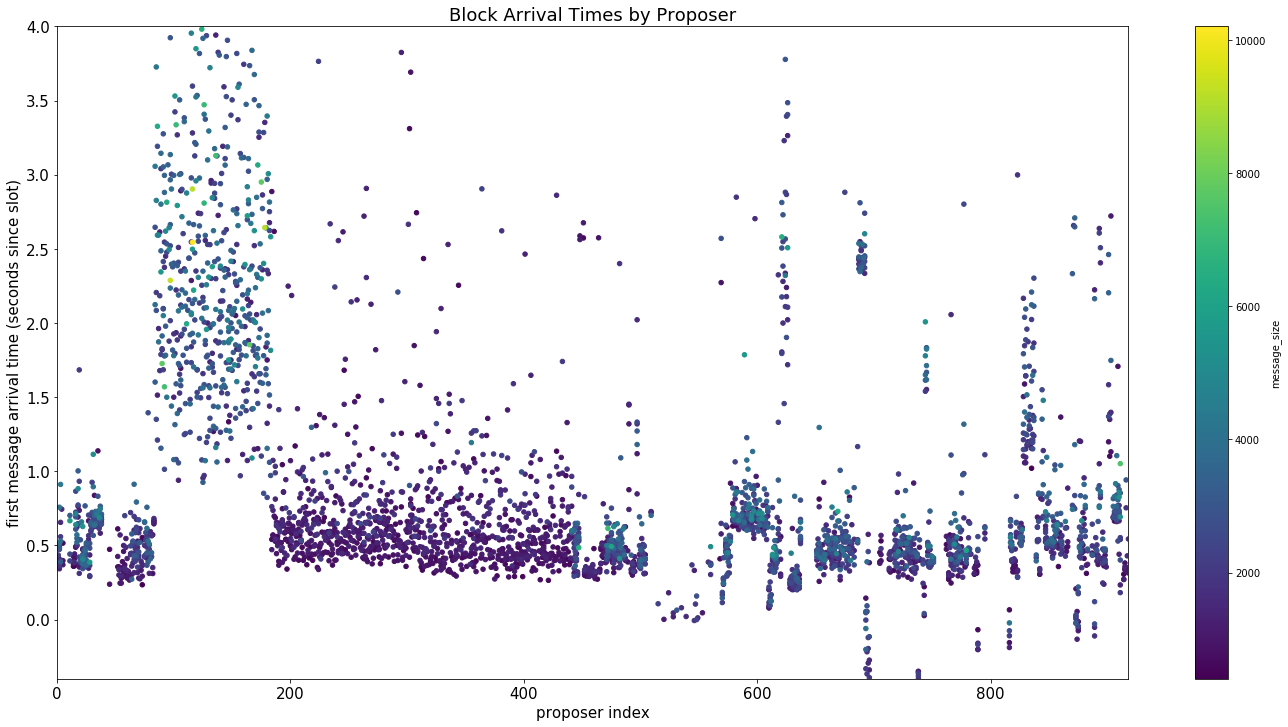

In [47]:
import matplotlib.pyplot as plt
df_first_message_size_timestamp = df_first[df_first['relative_timestamp']<4].groupby(['message_size','proposer_index']).agg({'relative_timestamp':['count','std','min','max']})
df_first_message_size_timestamp.columns = ['_'.join(col).strip() for col in df_first_message_size_timestamp.columns.values]
df_first_message_size_timestamp = df_first_message_size_timestamp.reset_index()


fig, ax = plt.subplots()
xlim = (df_first_message_size_timestamp['proposer_index'].min(),df_first_message_size_timestamp['proposer_index'].max())
ylim = (df_first_message_size_timestamp['relative_timestamp_min'].min(),4)
ax=df_first_message_size_timestamp.plot.scatter(x='proposer_index',y='relative_timestamp_min',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times by Proposer",fontsize=18)
ax.set_xlabel("proposer index",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("first message arrival time (seconds since slot)",fontsize=15)

In [50]:
df_prop_index = df_first.groupby('proposer_index')['peer_id'].apply(lambda peer_ids: ','.join(set(peer_ids))).to_frame()
df_prop_index['num_different_peers_first']=df_first.groupby('proposer_index')['peer_id'].nunique()
df_prop_index['num_times_proposed']=df_first.groupby('proposer_index').size()
df_prop_index.sort_values('num_times_proposed',ascending=False)

,peer_id,num_different_peers_first,num_times_proposed
proposer_index,,,
821,"16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv",7,17
140,"16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m,16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr",8,17
910,"16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m",8,16
679,"16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv",8,16
1,"16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m",6,16
...,...,...,...
531,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,1,1
524,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,1,1
515,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,1,1


In [51]:
peer_validator_map={}
for peer,is_validator in zip(df_first['peer_id'].to_list(),df_first['is_validator'].to_list()):
    peer_validator_map[peer]=is_validator
    
df_always_first = df_prop_index[(df_prop_index['num_different_peers_first']!=df_prop_index['num_times_proposed'])&(df_prop_index['num_different_peers_first']==1)].reset_index()
display(len(df_always_first))
is_validator=[]
for peer in df_always_first['peer_id'].to_list():
    is_validator.append(peer_validator_map[peer])
df_always_first['is_peer_validator']=is_validator
df_always_first[df_always_first['is_peer_validator']==True].sort_values('num_times_proposed',ascending=False)





80

,proposer_index,peer_id,num_different_peers_first,num_times_proposed,is_peer_validator
58,454,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m,1,12,True
11,206,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,1,10,True
45,281,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,1,10,True
19,220,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,1,10,True
38,266,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,1,10,True
...,...,...,...,...,...
71,603,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,1,2,True
72,749,16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,1,2,True
56,448,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,1,2,True
77,882,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa,1,2,True


In [52]:
df.groupby(['peer_id']).agg({'slot':['min','max']})

slot        
                                                          min     max
peer_id                                                              
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  105787  112867
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  105787  112867
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv  105787  107749
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  105787  112867
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti  105960  112867
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  105787  109269
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  105787  107029
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  105787  112867
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  105787  112867
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  105787  112867
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  105787  112867
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  105787  112867
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  105787  112867
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj  105787  112867
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  105787  112867
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  105787  112867
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv  105787  112867

In [53]:
def transform_peer_id(peer_id):
    peer_ids = list(set(df['peer_id'].to_list()))
    for index,an_id in enumerate(peer_ids):
        if an_id == peer_id:
            return index
        


df_first['peer_id_cat']=df_first['peer_id'].apply(transform_peer_id)
df_foo=df_first.sort_values('proposer_index',ascending = True).reset_index(drop=True)

df_foo.groupby(['peer_id','peer_id_cat']).count().sort_values('peer_id_cat',ascending = True)

,,message_id,index,posix_timestamp,topic,message_size,slot,proposer_index,slot_timestamp,relative_timestamp,timestamp,node_id,ip4,tcp4,udp4,ip6,tcp6,udp6,next_fork_version,next_fork_epoch,fork_digest,seq_no,subnet_ids,enr,coordinates,is_validator,distance,relative_timestamp_count,relative_timestamp_std,relative_timestamp_min,relative_timestamp_max
peer_id,peer_id_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP,0,49,49,49,49,49,49,49,49,49,49,49,49,49,49,0,0,0,49,49,49,49,49,49,49,49,49,49,49,49,49
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,1,274,274,274,274,274,274,274,274,274,274,274,274,274,274,0,0,0,274,274,274,274,274,274,274,274,274,274,274,274,274
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,2,509,509,509,509,509,509,509,509,509,509,509,509,509,509,0,0,0,509,509,509,509,509,509,509,509,509,509,509,509,509
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,4,199,199,199,199,199,199,199,199,199,199,199,199,199,199,0,0,0,199,199,199,199,199,199,199,199,199,199,199,199,199
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,5,116,116,116,116,116,116,116,116,116,116,116,116,116,116,0,0,0,116,116,116,116,116,116,116,116,116,116,116,116,116
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,6,622,622,622,622,622,622,622,622,622,622,622,622,622,622,0,0,0,622,622,622,622,622,622,622,622,622,622,622,622,622
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,7,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,0,0,0,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti,8,44,44,44,44,44,44,44,44,44,44,44,44,44,44,0,0,0,44,44,44,44,44,44,44,44,44,44,44,44,44


In [58]:
import plotly.figure_factory as ff
df_gantt=df_foo.groupby(['peer_id_cat']).agg({'posix_timestamp':['min','max']})
df_gantt.columns = ['_'.join(col).strip() for col in df_gantt.columns.values]
df_gantt = df_gantt.reset_index()
df_gantt=df_gantt.rename(columns={'peer_id_cat':'Task'}) 
df_gantt=df_gantt.rename(columns={'posix_timestamp_min':'Start'}) 
df_gantt=df_gantt.rename(columns={'posix_timestamp_max':'Finish'}) 

starts=[]
finishes=[]
for start,finish in zip(df_gantt['Start'],df_gantt['Finish']):
    starts.append(pd.to_datetime(start, unit='s'))
    finishes.append(pd.to_datetime(finish, unit='s'))
df_gantt['Start']=starts
df_gantt['Finish']=finishes
fig = ff.create_gantt(df_gantt,showgrid_x=True, showgrid_y=True,title='Active Peers')
fig.show()

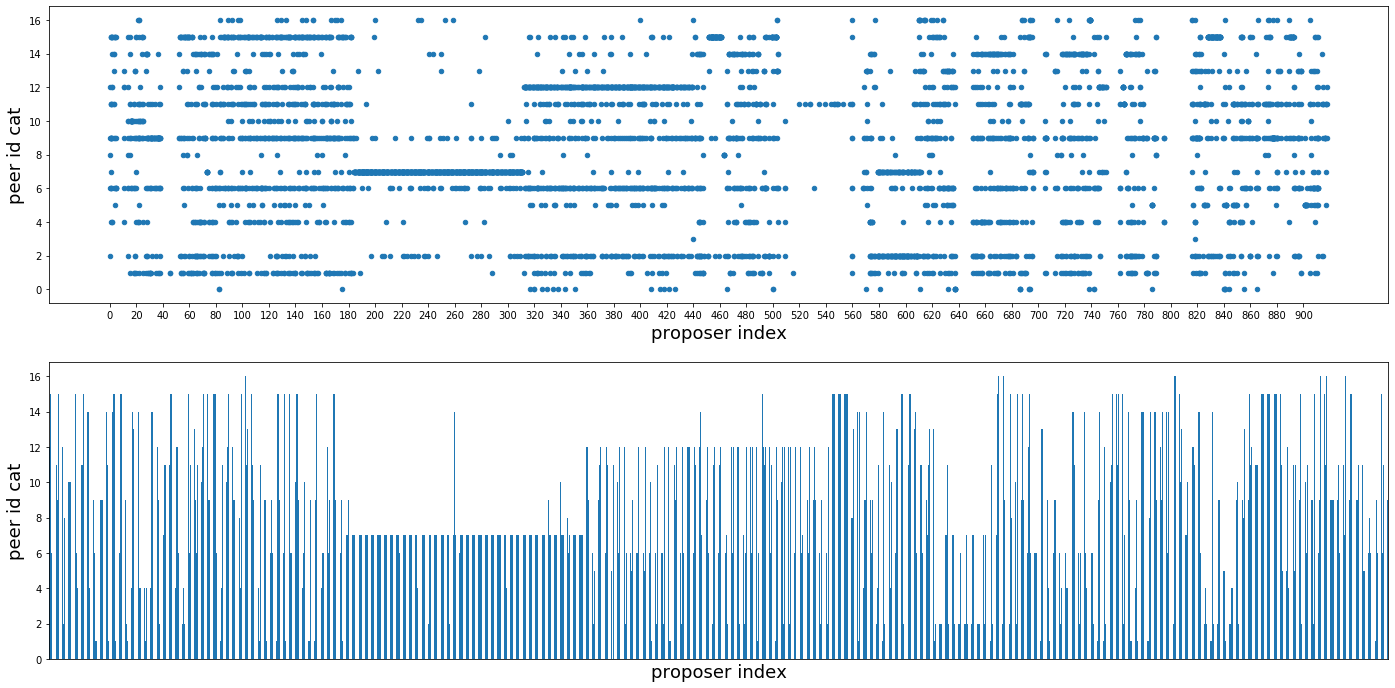

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
xticks=range(df_first['proposer_index'].min(),df_first['proposer_index'].max(),20)
ax[0]=df_foo.plot(kind='scatter',x='proposer_index',y='peer_id_cat',xticks=xticks,figsize=(24,12),ax=ax[0])
ax[0].set_ylabel("peer id cat",fontsize=18)
ax[0]=ax[0].set_xlabel("proposer index",fontsize=18)
ax[1]=df_foo.plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[1],legend=False)
ax[1].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[1].set_ylabel("peer id cat",fontsize=18)
ax[1]=ax[1].set_xlabel("proposer index",fontsize=18)

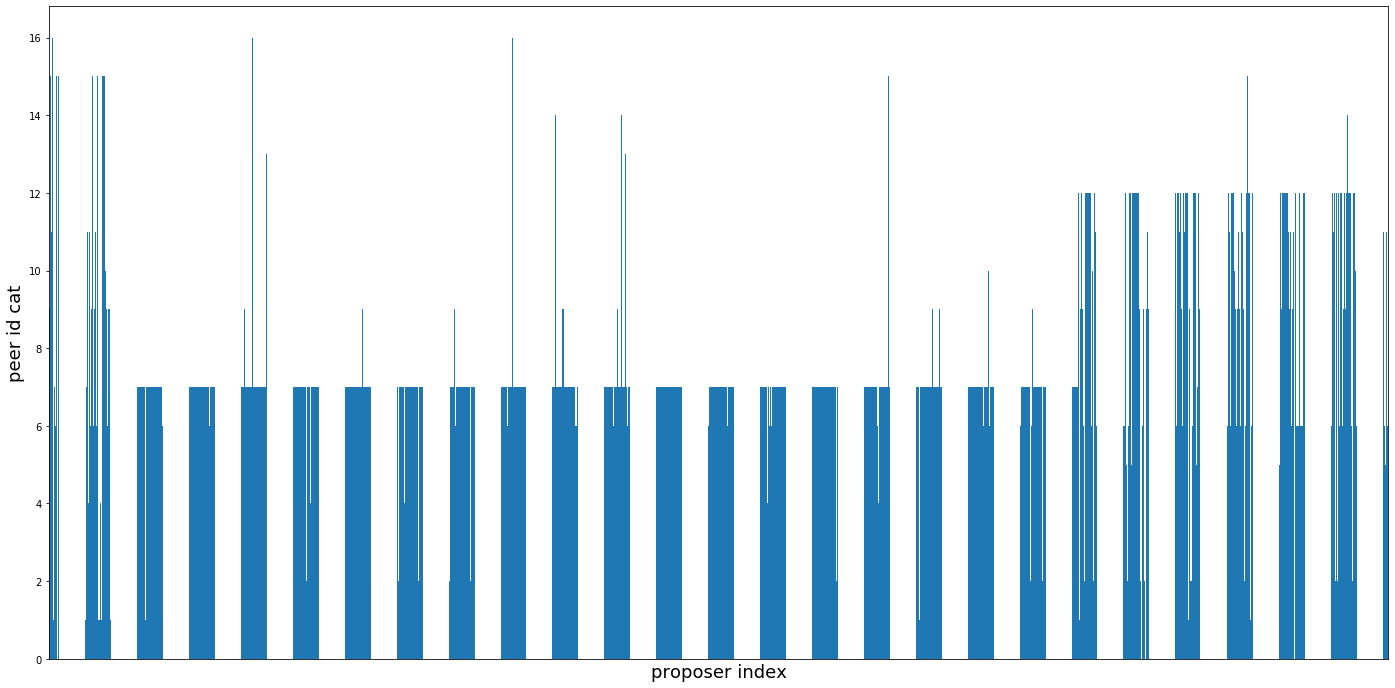

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24,8))

ax=df_foo[(df_foo['proposer_index']>173) & (df_foo['proposer_index']<351)].plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax,legend=False)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax.set_ylabel("peer id cat",fontsize=18)
ax=ax.set_xlabel("proposer index",fontsize=18)

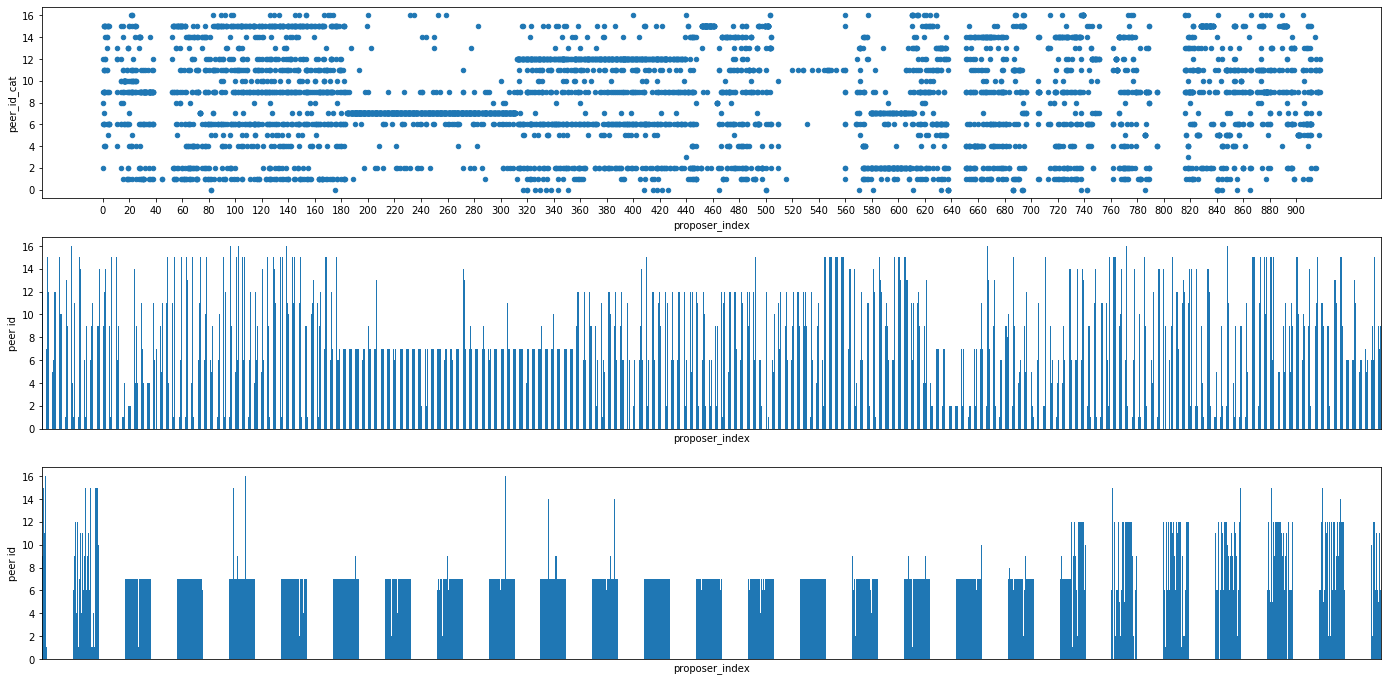

In [56]:
import matplotlib.pyplot as plt

       

fig, ax = plt.subplots(3)
xticks=range(df_first['proposer_index'].min(),df_first['proposer_index'].max(),20)


ax[0]=df_foo.plot(kind='scatter',x='proposer_index',y='peer_id_cat',xticks=xticks,figsize=(24,12),ax=ax[0])
ax[1]=df_foo.plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[1],legend=False)
ax[1].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[1]=ax[1].set_ylabel("peer id")
#ax[1].set_xticklabels([t if not i%20 else "" for i,t in enumerate(ax[1].get_xticklabels())])
ax[2]=df_foo[(df_foo['proposer_index']>173) & (df_foo['proposer_index']<351)].plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[2],legend=False)
ax[2].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[2]=ax[2].set_ylabel("peer id")


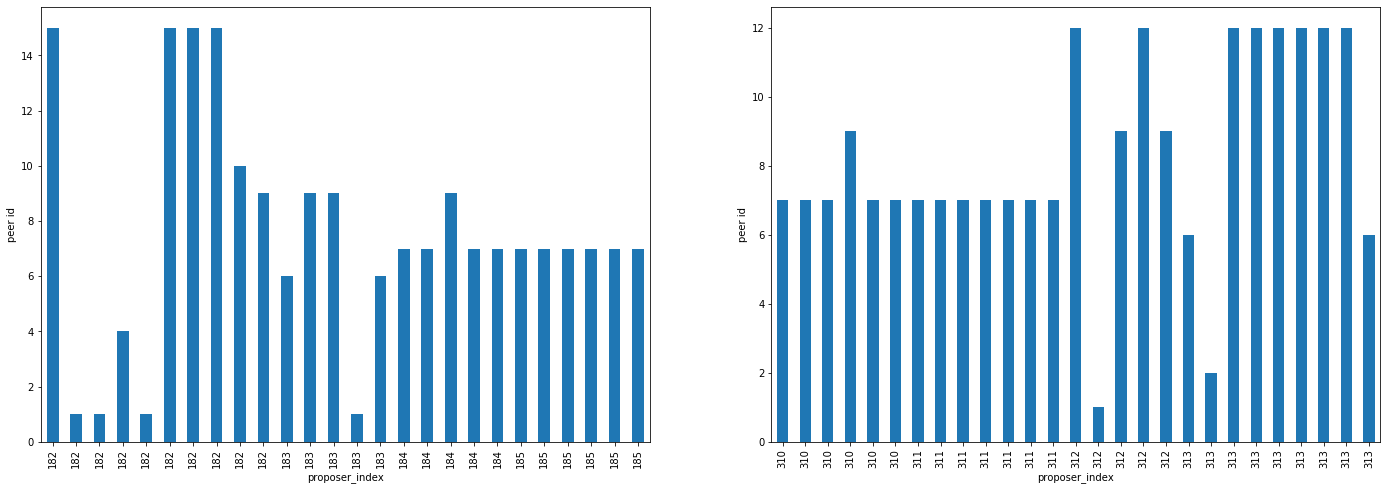

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24,8))

ax[0]=df_foo[(df_foo['proposer_index']>181) & (df_foo['proposer_index']<186)].plot(kind='bar',x='proposer_index',y='peer_id_cat',ax=ax[0],legend=False)
ax[0]=ax[0].set_ylabel("peer id")
ax[1]=df_foo[(df_foo['proposer_index']>309) & (df_foo['proposer_index']<314)].plot(kind='bar',x='proposer_index',y='peer_id_cat',ax=ax[1],legend=False)
ax[1]=ax[1].set_ylabel("peer id")



In [59]:
pd.set_option('display.max_rows', None)  
df_proposers = df_first.groupby('proposer_index')['relative_timestamp'].describe()
df_proposers.columns=[''.join(col).strip() for col in df_proposers.columns.values]
df_proposers = df_proposers.reset_index()
df_proposers[df_proposers['count']>1].sort_values('std')

,proposer_index,count,mean,std,min,25%,50%,75%,max
444,469,3.000000000000000,0.489333311716716,0.013650370993157,0.476999998092651,0.481999993324280,0.486999988555908,0.495499968528748,0.503999948501587
659,786,8.000000000000000,0.321500003337860,0.014182472082420,0.305999994277954,0.311000049114227,0.319000005722046,0.328499913215637,0.348000049591064
689,842,7.000000000000000,0.320142882210868,0.014622247653697,0.305999994277954,0.307500004768372,0.318000078201294,0.328999996185303,0.344000101089478
507,585,3.000000000000000,0.680000066757202,0.015394780344593,0.667000055313110,0.671500086784363,0.676000118255615,0.686500072479248,0.697000026702881
419,440,2.000000000000000,0.403499960899353,0.016263457315990,0.391999959945679,0.397749960422516,0.403499960899353,0.409249961376190,0.414999961853027
0,0,5.000000000000000,0.400999975204468,0.016537854957547,0.372999906539917,0.400000095367432,0.407999992370605,0.408999919891357,0.414999961853027
426,448,2.000000000000000,2.575500011444092,0.017677736964621,2.562999963760376,2.569249987602234,2.575500011444092,2.581750035285950,2.588000059127808
480,528,2.000000000000000,0.032000064849854,0.018384792495240,0.019000053405762,0.025500059127808,0.032000064849854,0.038500070571899,0.045000076293945
568,660,4.000000000000000,0.545000016689301,0.019612986489802,0.523999929428101,0.530749976634979,0.545500040054321,0.559750080108643,0.565000057220459
359,380,5.000000000000000,0.868000030517578,0.019646848191971,0.841000080108643,0.861999988555908,0.867000102996826,0.875000000000000,0.894999980926514
